In [39]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [3]:
df = pd.read_csv('Customer Purchasing Behaviors.csv')

In [7]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [11]:
df.shape

(238, 7)

In [21]:
df = df.rename(columns={'user_id':'User ID', 'age':'Age', 'annual_income':'Annual Income', 'purchase_amount':'Purchase Amount', 'loyalty_score':'Loyalty Score', 'region':'Region', 'purchase_frequency':'Purchase Frequency'})

In [23]:
df

,User ID,Age,Annual Income,Purchase Amount,Loyalty Score,Region,Purchase Frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13
...,...,...,...,...,...,...,...
233,234,40,60000,450,7.2,West,20
234,235,38,59000,430,6.9,North,20
235,236,54,74000,630,9.4,South,27
236,237,32,52000,360,5.8,West,18


In [25]:
df.isna().sum()

User ID               0
Age                   0
Annual Income         0
Purchase Amount       0
Loyalty Score         0
Region                0
Purchase Frequency    0
dtype: int64

In [29]:
df.loc[df.duplicated()]

,User ID,Age,Annual Income,Purchase Amount,Loyalty Score,Region,Purchase Frequency


In [35]:
df['Region'].value_counts()

Region
North    78
South    77
West     77
East      6
Name: count, dtype: int64

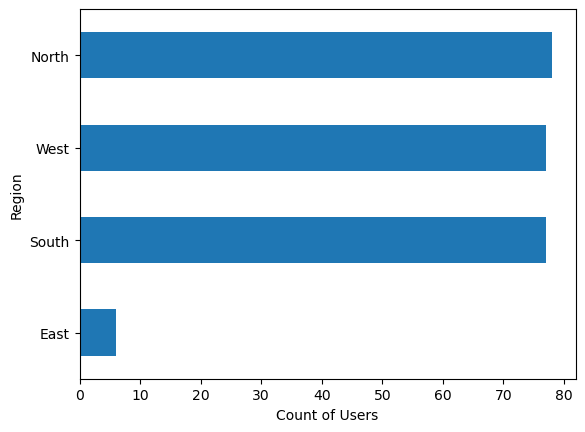

In [51]:
ax = df['Region'].value_counts().sort_values(ascending=True) \
    .plot(kind='barh')
ax.set_xlabel('Count of Users')
plt.show()


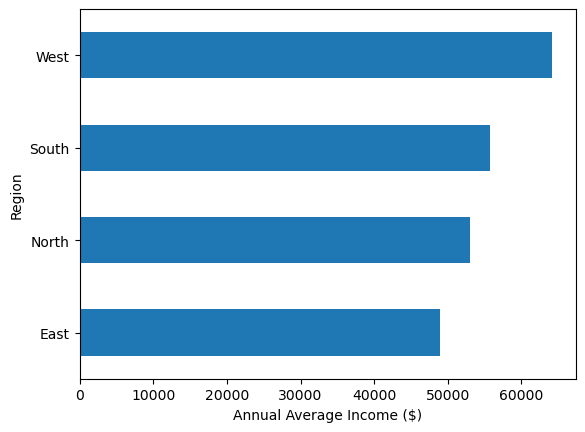

In [67]:
ax = df.groupby('Region')['Annual Income'].mean().sort_values(ascending = True)  \
    .plot(kind='barh')
ax.set_xlabel('Annual Average Income ($)')
plt.show()